In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
train, test = pd.read_csv("data/original/train.csv"), pd.read_csv("data/original/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"""
Training data have {len(train.columns.values)} features: {train.columns.values}\n
Testing data have {len(test.columns.values)} features: {test.columns.values}
""")


Training data have 12 features: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

Testing data have 11 features: ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']



In [6]:
train.info()
print("\n", "-" * 40, "\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 ---------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [7]:
print(f"""
Training data have the following missing values:
{train.isnull().sum()}\n
Testing data have the following missing values:
{test.isnull().sum()}
""")


Training data have the following missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Testing data have the following missing values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64



In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Until now, we grasped the basic structure of the data. Intuitively, features like $Age$, $Pclass$, $Fare$ and $Sex$ have impact on their survival rate, but there are also many missing data across training and testing sets in $Age$, which makes it difficult to directly include in model training. $SibSp$ and $Parch$ can be used to construct a family size feature. Maybe $Ticket$ can be grouped into different families, considering most of the boarding families would have purchased the tickets from the same departure and to the same destination with the same class and last name. Several missing data in $Fare$ and $Embarked$ can be easily filled in using their respective mode/median etc. Let's dive into the data for a better understanding. $Cabin$, on the other hand, have more than 70% missing values, so better off to drop it. Let's dive deeper into the data by visualizing features and the target.

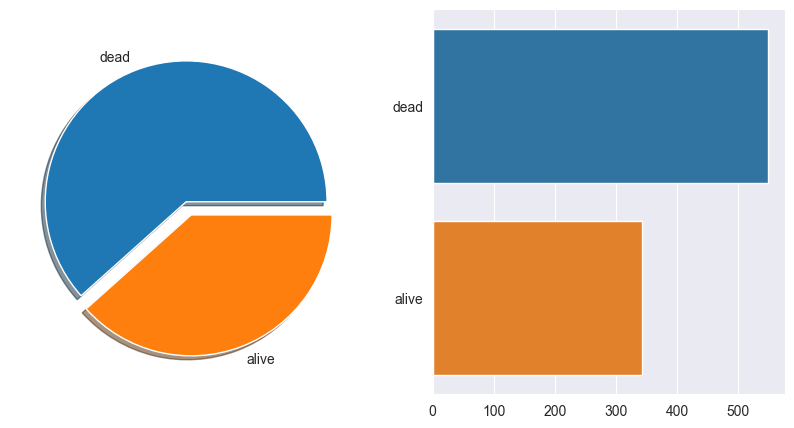

In [10]:
_, ax = plt.subplots(1, 2, figsize=[10, 5])
survived_train = train.Survived.replace({0: "dead", 1: "alive"})
survived_train.value_counts().plot.pie(explode=[0, 0.1], ax=ax[0], shadow=True)
ax[0].set_ylabel("")
sns.countplot(y=survived_train, ax=ax[1])
ax[1].set_xlabel("")
ax[1].set_ylabel("")
plt.show()

In [11]:
def bar(d, x_f, y_f):
    plt.figure(figsize=[5, 5])
    sns.barplot(data=d, x=x_f, y=y_f).set_title(f"{x_f} VS {y_f}")
    plt.show()

def table(d, x_f, y_f):
    return d[[x_f, y_f]].groupby([x_f], as_index=False).mean().sort_values(by=y_f, ascending=False).set_index(x_f)

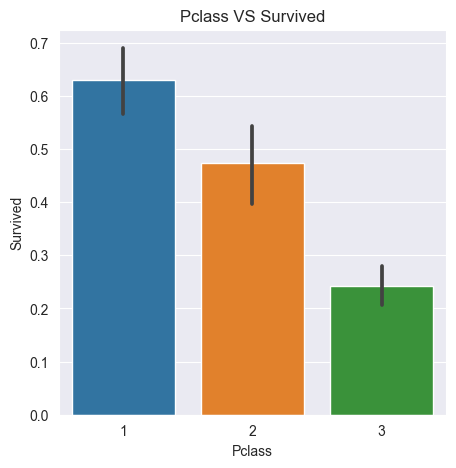

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [12]:
# Pclass VS Survived
bar(train, "Pclass", "Survived")
table(train, "Pclass", "Survived")

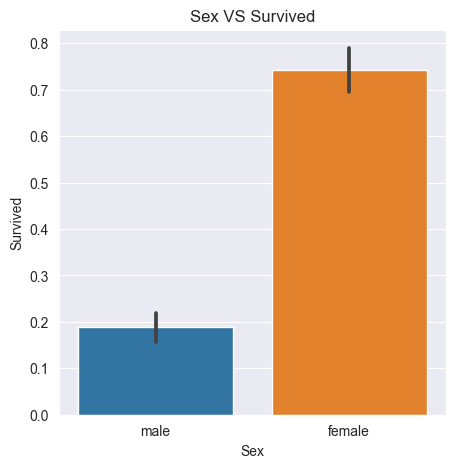

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
# Sex VS Survived
bar(train, "Sex", "Survived")
table(train, "Sex", "Survived")

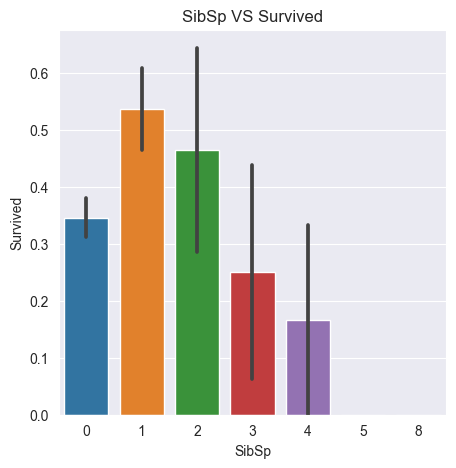

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [14]:
# SibSp VS Survived
bar(train, "SibSp", "Survived")
table(train, "SibSp", "Survived")

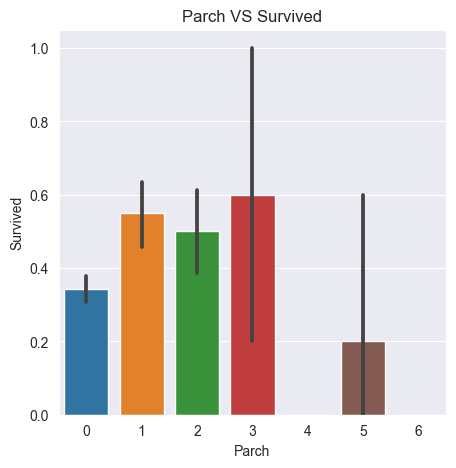

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [15]:
# Parch VS Survived
bar(train, "Parch", "Survived")
table(train, "Parch", "Survived")

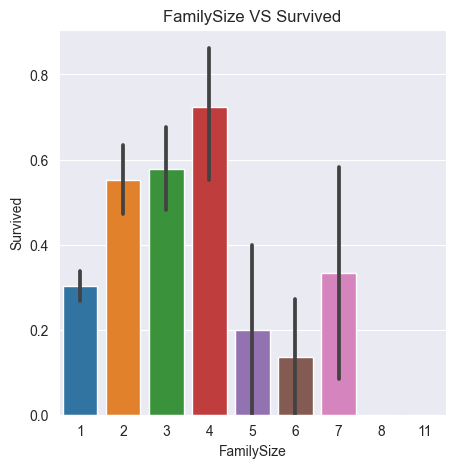

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [16]:
# FamilySize VS Survived
f_train = train.copy()
f_train["FamilySize"] = train.SibSp + train.Parch + 1
bar(f_train, "FamilySize", "Survived")
table(f_train, "FamilySize", "Survived")

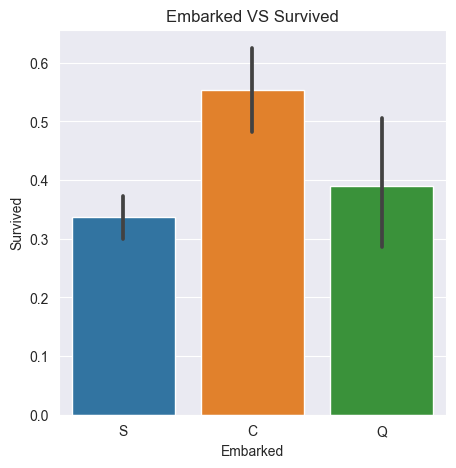

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [17]:
# Embarked VS Survived
bar(train, "Embarked", "Survived")
table(train, "Embarked", "Survived")

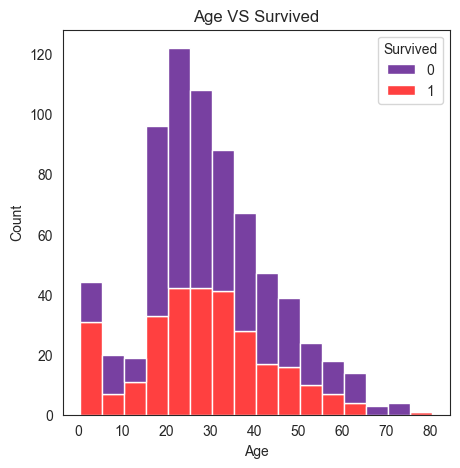

In [18]:
# Age VS Survived
color = sns.color_palette(["indigo", "red"])
plt.figure(figsize=[5, 5])
sns.set_style("white")
sns.histplot(data=train, x="Age", hue="Survived", binwidth=5, palette=color, multiple="stack").set_title("Age VS Survived")
plt.show()

It seems the distributions of $Age$ against $Survived$ follow the same trend, which could be suggesting that including the $Age$ feature in model training is futile, but further analysis needed.

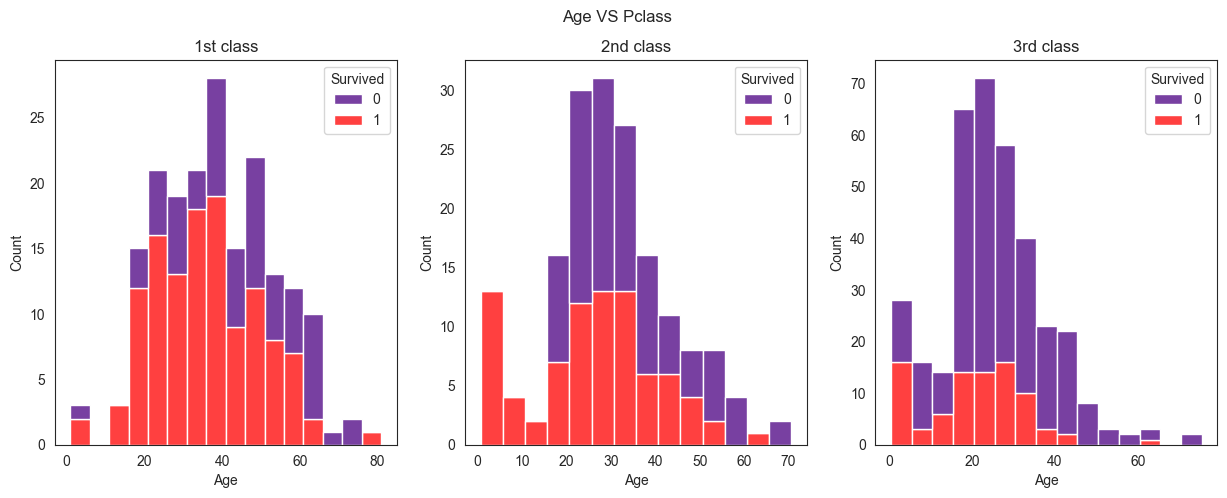

In [19]:
_, ax = plt.subplots(1, 3, figsize=[15, 5])
plt.suptitle("Age VS Pclass")
sns.histplot(train.query("Pclass == 1"), x="Age", hue="Survived", binwidth=5, ax=ax[0], palette=color, multiple="stack").set_title("1st class")
sns.histplot(train.query("Pclass == 2"), x="Age", hue="Survived", binwidth=5, ax=ax[1], palette=color, multiple="stack").set_title("2nd class")
sns.histplot(train.query("Pclass == 3"), x="Age", hue="Survived", binwidth=5, ax=ax[2], palette=color, multiple="stack").set_title("3rd class")
plt.show()

Again, we observed that the distributions against Age have similar trends, which increased our doubt for the importance of $Age$.

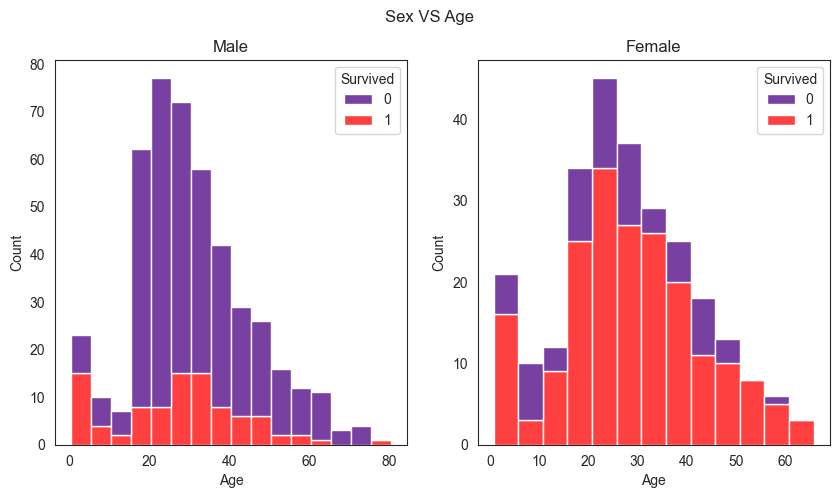

In [20]:
_, ax = plt.subplots(1, 2, figsize=[10, 5])
plt.suptitle("Sex VS Age")
sns.histplot(train.query("Sex == 'male'"), x="Age", hue="Survived", binwidth=5, ax=ax[0], palette=color, multiple="stack").set_title("Male")
sns.histplot(train.query("Sex == 'female'"), x="Age", hue="Survived", binwidth=5, ax=ax[1], palette=color, multiple="stack").set_title("Female")
plt.show()

Again, similar distributions. At this point, we grew weary of the feature $Age$, and tried to fill in Age based on the available data. However, since the available data displayed such similar distributions, the derived data can also possess the same intrinsic quality.

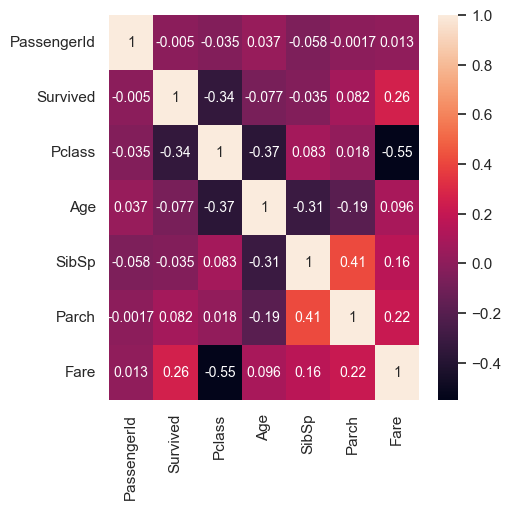

In [21]:
sns.set(rc={"figure.figsize": [5, 5], "font.size": 10})
sns.heatmap(train.corr(), annot=True)
plt.show()

By observing the whitish and warmer colors in this heatmap, we confirmed some hypothesis at the beginning: like $Fare$ can be seen as related to $Survived$; $SibSp$ and $Parch$ can be combined to a family feature.